# **Evaluation Techniques for Classification Models**

In the realm of machine learning, evaluating the performance of classification models is crucial to understand their effectiveness and reliability. 

- This notebook delves into various evaluation techniques that help in assessing the quality of classification models. 

- We'll explore fundamental metrics such as accuracy, precision, recall, and F1-score, and how they can be interpreted to gauge model performance. 

- Additionally, we'll cover advanced concepts like the ROC curve, AUC score, and confusion matrix, which provide deeper insights into a model's ability to distinguish between classes. 

Understanding these evaluation techniques enables data scientists and practitioners to select the best model for their specific use case, ensuring robust and reliable predictions. Through hands-on examples and code implementations, this notebook aims to equip you with the tools and knowledge needed to effectively evaluate classification models and make data-driven decisions.

For demonstration of evaluation techniqus we forst need to create a model. Here I am using the standard iris dataset and I am using Decision Tree to train my model. We will apply the evaluation metrics on this model.

In [19]:
import pandas as pd 
import numpy as np 
from sklearn import tree 
from sklearn import datasets 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [20]:
iris = load_iris() 
X = iris.data 
y = iris.target 

# Holdout method.Dividing the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.20) 
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test) 

In [33]:
# Create a DataFrame from the data and target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---
# **Accuracy Score**
The accuracy score is a fundamental metric used to evaluate the performance of classification models. It measures the proportion of correctly predicted instances out of the total instances in the dataset.


In simple words we define the accuracy score as:

#### ***`accuracy = number of correct predictions / total number of predictions`***

In a more general view we can define acccuracy as:

#### ***`accuracy = TP + TN / TP + TN + FP + FN`***
where, 

TP (True Positives): Correctly predicted positive instances.

TN (True Negatives): Correctly predicted negative instances.

FP (False Positives): Incorrectly predicted positive instances.

FN (False Negatives): Incorrectly predicted negative instances.

Accuracy ranges from 0 to 1, where 1 indicates a perfect model and 0 indicates no correct predictions.

For example, If we had 100 people, 50 of whom were cheese lovers and 50 of who were cheese haters, and we correctly identified 36 of the cheese lovers and 24 of the cheese haters, my accuracy would be

accuracy = (36+24) / (50+50) = 60%.

### **Is accuracy always a good metric to see the results**

If we say that a model has an accuracy of 99%, can we conclude that it is a good accuracy? Well the answer is no.

Whilst accuracy score is fine for balanced classes, like the cheese lovers/haters example above, it can be very misleading for unbalanced classes.

- **Balanced classes** are those where we have an equal number of individuals in each class in our sample. Here is a balanced class:

    Cheese lovers: 50 people
  
    Cheese haters: 50 people

- **Unbalanced classes** are those where there are unequal numbers of individuals in each class in our sample. Here is an unbalanced class:

    Lottery winners: 1 person
  
    Lottery losers: 45 million people

**Why Accuracy May Not Be Suitable for Unbalanced Classes**

This is because accuracy simply measures the proportion of correctly predicted instances out of the total number of instances, without considering the distribution of classes.

Let's understand it with the help of an example:

Consider a binary classification problem where you want to predict whether a patient has a rare disease (positive class) or not (negative class). Suppose your dataset is highly unbalanced with 95% negative cases and only 5% positive cases:

- Total number of samples: 1,000
- Number of positive cases (disease): 50
- Number of negative cases (no disease): 950

Imagine a model that always predicts "no disease" for every patient. This model would be classified as follows:

**True Negatives (TN):** 950 (correctly predicted as "no disease")
**False Positives (FP):** 0 (incorrectly predicted as "disease" when it was "no disease")
**True Positives (TP):** 0 (incorrectly predicted as "no disease" when it was "disease")
**False Negatives (FN):** 50 (incorrectly predicted as "no disease" when it was "disease")

Accuracy = 95%

Despite having an accuracy of 95%, this model completely fails to predict the minority class (Class 1). This high accuracy is misleading because the model is not performing well in recognizing the minority class, which might be of greater interest or importance in many applications.

We can use sklearn to compute the accuracy of our model, we need to give the true label sanf the predicted labels and the function will compute the accuracy score of our model.

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9333333333333333


---
# **2. Precision**
It measures the proportion of true positive predictions (correctly predicted positive instances) out of all the positive predictions made by the model. 

Precision is particularly useful when the cost of false positives is high.

#### ***`Precision = TP / TP + FP`***

where,

**True Positives (TP):** The number of positive instances correctly predicted by the model.

**False Positives (FP):** The number of instances incorrectly predicted as positive when they are actually negative.

Consider an example, 
Let's say we are trying to predict whether an email is spam (positive class) or not spam (negative class). After making predictions, you obtain the following confusion matrix:

**1. True Positives (TP): 30** 

**2. False Positives (FP): 5**

**3. False Negatives (FN): 10**

**4. True Negatives (TN): 55**

The precision would be 30 / 30 + 5 = 85.7%

Precision of 85.7% means that out of all emails classified as spam, 85.7% are actually spam. This is a measure of how many of the predicted positive results are truly positive.

### **Limitations of Precision**
Precision focuses only on false positives and true positives but completely ignores false negatives. This means that precision alone does not measure how well a model identifies all relevant positive instances.

Consider a medical diagnostic test for a rare disease. Let's say:

**True Positives (TP):** 50 (patients correctly identified as having the disease)

**False Positives (FP):** 5 (healthy patients incorrectly identified as having the disease)

**False Negatives (FN):** 150 (patients with the disease who were incorrectly identified as healthy)

**True Negatives (TN):** 1000 (healthy patients correctly identified as healthy)

The precision would be 91%. Even though the precision is high (91%), the test has missed 150 patients with the disease (false negatives). This means many patients who are actually sick are not being identified, which can be a critical issue in a healthcare setting.

In [26]:
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')) 

Precision: 0.9435897435897436


This means that 94% of our data was true positive predicted. 

---
# **3. Recall**
Recall (also known as Sensitivity or True Positive Rate) is a metric that evaluates the ability of a classification model to identify all relevant positive instances. 

It measures the proportion of actual positives that are correctly identified by the model.

#### ***`Recall = TP / TP + FN`***

In other words, recall answers the question: can an ML model find all instances of the positive class?

Thus, For example, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.

If the Recall  = 0.86. Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate. What if a patient has heart disease, but no treatment is given to him/her because our model predicted so? That is a situation we would like to avoid!

In [27]:
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')) 

Recall: 0.9333333333333333


---
# **4. F1 Score**
Having measures to help us pull our models towards high precision or high recall is really useful. But what if we want a balanced measure, one that balances both precision and recall? The F1 score does just that, and is calculated as follows:

#### ***`F1 = 2 * Precision * Recall / Precision + Recall`***

In sklearn we need to add average when we calculate the F1 Score.
average can be:
- `binary`: Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
- `micro`: Calculate metrics globally by counting the total true positives, false negatives and false positives.
- `macro`: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- `weighted`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [28]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')) 

F1 Score: 0.9327777777777778


---
# **5. Confusion Matrix**
A confusion matrix is a table that is used to define the performance of a classification algorithm. 

In scikit-learn, a confusion matrix is a performance measurement tool for classification problems. It provides a summary of the prediction results on a classification problem by comparing the true labels (actual outcomes) with the predicted labels (model predictions). The confusion matrix shows the counts of the correct and incorrect predictions, which helps to understand the performance of a classification model.

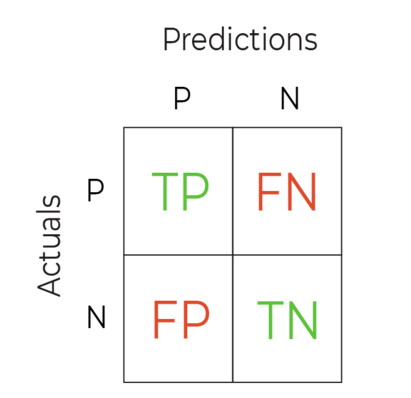

For multi-class classification problems, the confusion matrix is extended to an NxN matrix, where N is the number of classes. Each row represents the instances in an actual class, while each column represents the instances in a predicted class.

If we print the confusion matrix of our model 

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

To create a more interpretable visual display we need to convert the table into a confusion matrix display.

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

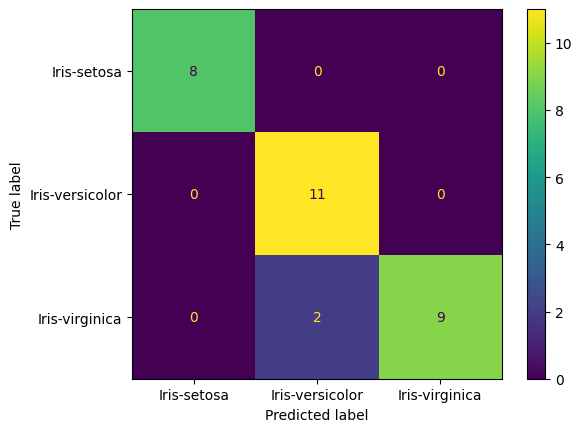

In [41]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

From the above plot we acn see that 2 instances of class 2 were incorrectly classified as class 1.
Other than that all instances were correctly predicted.

---
# **Receiver Operating Characteristic (ROC) Curve**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#### **True Positive Rate**

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
#### ***`TPR = TP / TP + FN`***

#### **False Positive Rate**
#### ***`FPR = FP / FP + TN`***

Typically ROC Curve is used for binary classification. By adjusting the threshold, healthcare professionals can choose a point on the curve that balances these factors according to the context, such as the severity of the disease and the consequences of false positives or false negatives.

Now we will train a binary classification data using Logistic Regression and adjust the threshold using ROC Curve.

In [42]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In the testing pahse we will be predicitng the probabilities instead of labels and then we will get the FPR, TPR and threshold using the roc_curve method.

In [46]:
y_scores = model.predict_proba(X_test)[:,1]

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [48]:
thresholds

array([1.99355988e+00, 9.93559880e-01, 9.52622236e-01, 9.52431281e-01,
       8.24649217e-01, 7.68785139e-01, 7.62084165e-01, 6.83892849e-01,
       6.75401963e-01, 6.74194852e-01, 6.51160703e-01, 6.50852686e-01,
       6.35596265e-01, 5.86285586e-01, 5.75680539e-01, 5.69730880e-01,
       5.25254827e-01, 4.70273418e-01, 4.61218138e-01, 4.50440904e-01,
       4.38942687e-01, 4.38655977e-01, 4.22094906e-01, 4.19918162e-01,
       4.12912934e-01, 4.12006218e-01, 4.04764937e-01, 3.79702578e-01,
       3.68652975e-01, 3.10181073e-01, 3.08805269e-01, 2.77743854e-01,
       2.71997928e-01, 2.58474746e-01, 2.55156282e-01, 2.47442932e-01,
       2.45508327e-01, 2.36554726e-01, 2.28894872e-01, 1.81848208e-01,
       1.78656037e-01, 1.74617283e-01, 1.73313406e-01, 1.46364532e-01,
       1.40805420e-01, 1.16711628e-01, 1.14930426e-01, 1.10000756e-01,
       1.06701251e-01, 8.92327115e-02, 8.67501626e-02, 2.00090231e-02,
       1.93062126e-02, 1.60776532e-03])

Now if want to know which threshold will be best for our model, we can this code:

In [49]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3686529748384333


So our optimal threshold is 0.368 where the model gives best classification results. We can also display the ROC Curve using ROCCurveDisplay method.

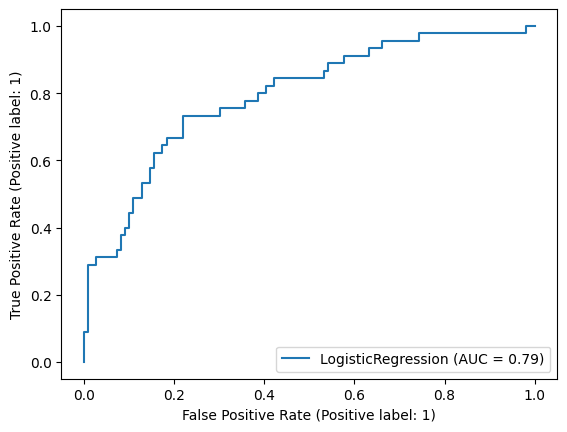

In [51]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)

---
# **Area Under the Curve(AUC)**
In scikit-learn (sklearn), AUC stands for "Area Under the Curve," specifically referring to the area under the Receiver Operating Characteristic (ROC) curve. The AUC provides a single scalar value that summarizes the performance of a binary classifier. It ranges from 0 to 1, with 1 indicating a perfect model and 0.5 indicating a model with no discrimination ability, equivalent to random guessing.


We can use the FPR and TPR calcualted above to calcualte our ara under the curve.

In [52]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.7936799184505606

We can also compare two models by comparing the AUC for the wo models. Let's we train the same data with SVM as we did with Logistic Regression to compare the performance.

In [62]:
from sklearn.svm import SVC

model_SVC = SVC(max_iter=1000)
model_SVC.fit(X_train, y_train)
y_pred_svm = model_SVC.decision_function(X_test)


In [64]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(max_iter = 1000)
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

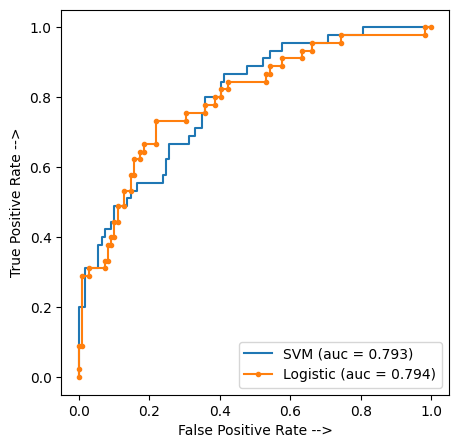

In [65]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


From the above plots we can see that the AUC for the two models is almost same, but Logistic Regression model performs slightly better than the SVM as its AUC is greater than the SVc.

---
# **Cross Validation**
In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique. 

- In cross validation we divide the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.
- This process is repeated multiple times, each time using a different fold as the validation set.
- Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.


Let's say we have trained our Random Forest model on the iris datset. We will apply all the validation types on our data one-by one and see the results.

In [67]:
from sklearn.ensemble import RandomForestClassifier
# Load the dataset
data = load_iris()
X, y = data.data, data.target


## **Types of Cross Validation**
### **1. Holdout Validation**
- In Holdout Validation, we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose.
- The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e. higher bias.

In [68]:
# Hold out validation using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### **2. K-Fold Cross-Validation**
In K-Fold Cross-Validation, the dataset is divided into K equally sized folds. The model is trained K times, each time using K-1 folds for training and the remaining fold for testing.

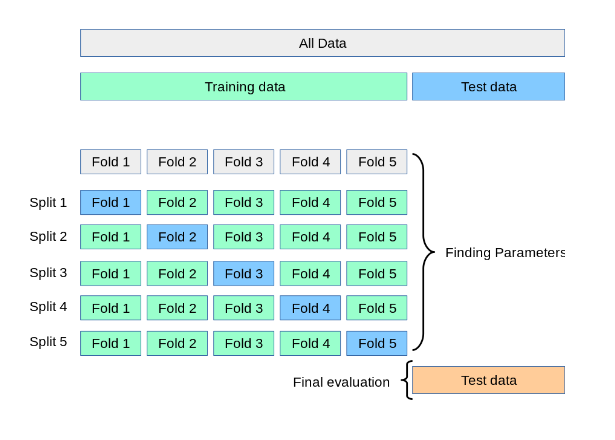

In [72]:
from sklearn.model_selection import KFold, cross_val_score

# Create the model
model = RandomForestClassifier()

# Set up K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate the model
scores = cross_val_score(model, X, y, cv = kf)
print(f"Cross-Validation Scores: ",scores)
print(f"Mean Accuracy: {scores.mean()}")


Cross-Validation Scores:  [1.         0.97368421 0.89189189 0.97297297]
Mean Accuracy: 0.9596372688477952


### **3. Stratified K-Fold Cross-Validation**
Stratified K-Fold Cross-Validation is similar to K-Fold but ensures that each fold has a similar distribution of target classes. This is especially useful for imbalanced datasets.

In [73]:
from sklearn.model_selection import StratifiedKFold

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits = 4, shuffle=True, random_state=42)

# Evaluate the model
scores = cross_val_score(model, X, y, cv = skf)
print(f"Stratified Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


Stratified Cross-Validation Scores: [1.         0.92105263 0.97297297 0.91891892]
Mean Accuracy: 0.9532361308677099


### **4. Leave-One-Out Cross-Validation (LOOCV)**
LOOCV is a special case of K-Fold where K is equal to the number of observations in the dataset. Each observation is used once as a test set, and the model is trained on the rest.



In [74]:
from sklearn.model_selection import LeaveOneOut

# Set up Leave-One-Out cross-validation
loo = LeaveOneOut()

# Evaluate the model
scores = cross_val_score(model, X, y, cv=loo)
print(f"LOOCV Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


LOOCV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 0.9466666666666667


---
# **Classification Report**
A classification report in scikit-learn provides a detailed overview of the performance of a classification model. It includes metrics such as precision, recall, F1-score, and support for each class in the target variable. These metrics help evaluate how well the model is performing in terms of correctly classifying the instances of each class.

In [75]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The classification report you've provided indicates the performance of a classification model on a dataset with three classes: setosa, versicolor, and virginica. Here's a breakdown of what each metric tells us:

1. **Setosa**
   - **Precision: 1.00**
     - This means that all predictions for the `setosa` class were correct. There were no false positives.
   - **Recall: 1.00**
     - All actual instances of `setosa` were correctly identified by the model. There were no false negatives.
   - **F1-Score: 1.00**
     - The F1-score is the harmonic mean of precision and recall. Since both precision and recall are perfect (1.00), the F1-score is also perfect.

2. **Versicolor**
   - **Precision: 1.00**
     - All predictions for the `versicolor` class were correct. There were no false positives.
   - **Recall: 1.00**
     - All actual instances of `versicolor` were correctly identified by the model. There were no false negatives.
   - **F1-Score: 1.00**
     - The F1-score is perfect, indicating a perfect balance between precision and recall.

3. **Virginica**
   - **Precision: 1.00**
     - All predictions for the `virginica` class were correct. There were no false positives.
   - **Recall: 1.00**
     - All actual instances of `virginica` were correctly identified by the model. There were no false negatives.
   - **F1-Score: 1.00**
     - The F1-score is perfect.

### Overall Metrics

- **Accuracy: 1.00**
  - The model correctly classified all instances in the dataset. The accuracy of 1.00 indicates perfect performance across all classes.

- **Macro Average:**
  - **Precision: 1.00, Recall: 1.00, F1-Score: 1.00**
  - The macro average is the unweighted average of the metrics for each class. In this case, all classes have perfect metrics, so the macro average is also perfect.

- **Weighted Average:**
  - **Precision: 1.00, Recall: 1.00, F1-Score: 1.00**
  - The weighted average accounts for the number of instances in each class. Since all classes have perfect metrics and are equally represented (or very close to it), the weighted average is also perfect.